In [1]:
import sys
sys.path.append('../')

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

DATA_PATH = "/dust3r/masked_dust3r/data/jackal_training_data_0"

with open(os.path.join(DATA_PATH, "transforms.json"), "r") as f:
    transforms = json.load(f)

[[  33.16471713   -1.25038884 -150.49104488]
 [  33.20936547   -1.26124459 -155.91257959]
 [  33.21202366   -1.23400309 -161.48784167]
 [  33.20628724   -1.22240869 -169.55789056]
 [  33.21110122   -1.2514884  -178.08423733]
 [  33.22691567   -1.21344412  173.28883425]
 [  33.21722708   -1.22405594  164.74662252]
 [  33.17542524   -1.18313749  158.76170173]
 [  33.16676944   -1.18169919  152.66707705]
 [  33.17665413   -1.18899329  144.54282098]
 [  33.17820258   -1.25437061  133.41167184]
 [  33.21904289   -1.22115869  109.48390456]
 [  33.18895656   -1.2613106    86.54983679]
 [  33.2012419    -1.24330374   86.65768507]
 [  33.19057391   -1.24278939   82.89377297]
 [  33.19060609   -1.20044862   78.90819456]
 [  33.16682767   -1.24220266   75.0402217 ]
 [  33.21599148   -1.22518996   71.42134285]
 [  33.21433975   -1.18187086   68.61461197]
 [  33.23318432   -1.18302346   65.89023172]
 [  33.23236324   -1.19218453   63.04584926]
 [  33.19561423   -1.2098272    59.33834756]
 [  33.167

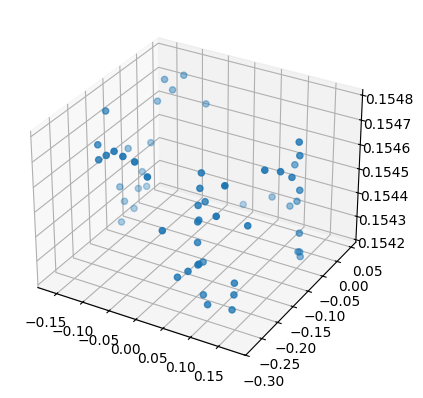

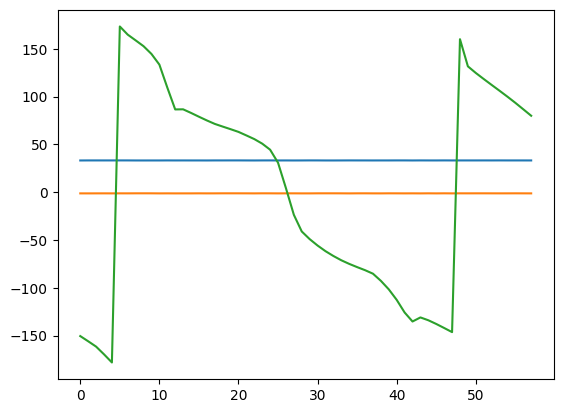

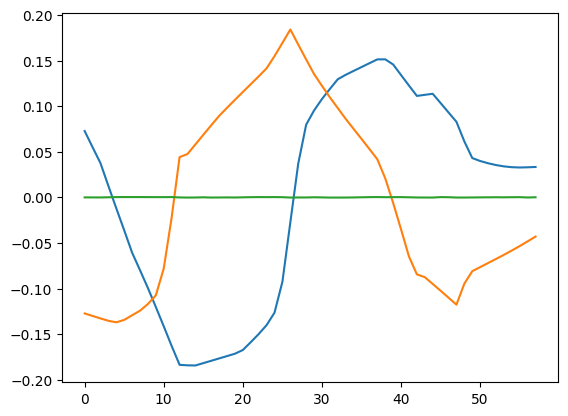

In [2]:
#transforms["frames"] = rotate_best_fit_plane(transforms["frames"])

points = []
euler_angle = []
for frame in transforms["frames"]:
    tf = frame["transform_matrix"]
    tf = np.array(tf).reshape(4, 4)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))

points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()